In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
import seaborn as ssn
ssn.set()

In [3]:
crime_df=pd.read_csv("C:/Users/home/Clustering/crime_data.csv")
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_df.rename({"Unnamed: 0":"Region"},inplace=True,axis=1)
crime_df.head()

,Region,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_df.shape

(50, 5)

In [6]:
# Stadardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime_df.iloc[:,1:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Heirarchical Clustering

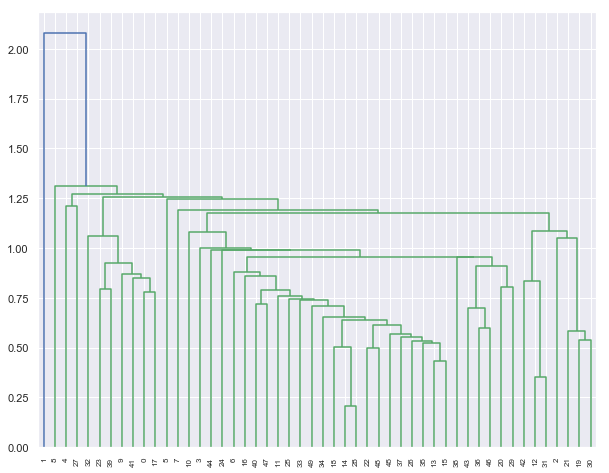

In [7]:
# create dendrogram
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_crime_df, method='single'))

In [8]:
# create clusters
Heirarchical_df = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [9]:
# save clusters for chart
heir_df=crime_df.copy()
heir_df['clusetr_ID'] = Heirarchical_df.fit_predict(scaled_crime_df)
heir_df.head(10)

,Region,Murder,Assault,UrbanPop,Rape,clusetr_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [10]:
heir_df.groupby("clusetr_ID").mean()

,Murder,Assault,UrbanPop,Rape
clusetr_ID,,,,
0,7.452174,161.130435,64.717391,19.534783
1,10.600000,264.000000,86.000000,43.300000
2,15.400000,335.000000,80.000000,31.900000
3,10.000000,263.000000,48.000000,44.500000


In [11]:
heir_df.groupby("clusetr_ID").sum()

,Murder,Assault,UrbanPop,Rape
clusetr_ID,,,,
0,342.8,7412,2977,898.6
1,21.2,528,172,86.6
2,15.4,335,80,31.9
3,10.0,263,48,44.5


In [12]:
#From the above table we can conclude that in cluster 1 the total
#murder cases is 342, assault cases are 7412, Urbonpop cases are 2977 and Rape cases are 898.

## KMeans Clustering

In [14]:
from sklearn.cluster import KMeans

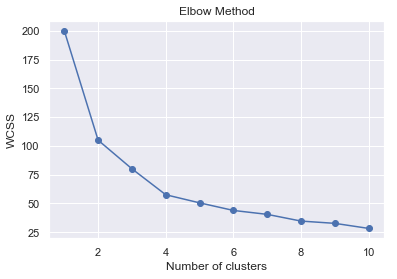

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,"-o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [16]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535069,
 43.927464044975736,
 40.52183461131976,
 34.6873883978491,
 32.70648136388185,
 28.31163939712256]

In [17]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [18]:
#Assign clusters to the data set
kmean_df=crime_df.copy()
kmean_df['Cluster_ID'] = clusters_new.labels_

In [19]:
kmean_df.Cluster_ID.value_counts()

0    16
3    13
2    13
1     8
Name: Cluster_ID, dtype: int64

In [20]:
kmean_df.groupby("Cluster_ID").sum()

,Murder,Assault,UrbanPop,Rape
Cluster_ID,,,,
0,90.5,2222,1182,300.5
1,111.5,1949,430,171.3
2,140.6,3346,988,431.5
3,46.8,1021,677,158.3


## DBSACN

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=1.3, min_samples=4)
dbscan.fit(scaled_crime_df)

DBSCAN(algorithm='auto', eps=1.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=None, p=None)

In [23]:
dbscan.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [24]:
clusters=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [25]:
db_df=pd.concat([crime_df,clusters],axis=1)
db_df.head(10)

,Region,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [26]:
db_df.groupby('Cluster').sum()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,34.4,874,219,117.0
0,355.0,7664,3058,944.6
